# Almog PIV project

See Readme.md

April 23
run 3 it's 5 deg angle
maps 1000-1249


In [1]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pathlib


plt.rcParams["figure.figsize"] = (10, 10)


/home/user/Documents/repos/pivpy/pivpy/io.py:19: UserWarning: lvreader is not installed
  warnings.warn("lvreader is not installed")


In [2]:
# run 3, see above is the angle 5 deg
run_no = 3
first_file = 1000
num_files = 200

In [3]:
root_path = pathlib.Path('/media/user/ExtremePro/almog/april23_') # originally `run1`
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'
im = plt.imread(image_path / f'run1_00{first_file}.T000.D000.P000.H000.LB.TIF')



list_files = sorted(analysis_path.rglob('run1_00*.vec'))
netcdf_file = f'../data/april23_run{run_no}.nc'
res_png = f'../results/april23_run{run_no}.png'



In [4]:

# since we have some demo files 200, 202, we need to start with 210
ids = np.array([int(str(f).split('run1_')[-1].split('.')[0]) for f in list_files])

# manually substitute the first and the last files
selection = np.nonzero([(ids >= first_file) & (ids<first_file+num_files)])

list_files = np.array(list_files)[selection[1]]

In [5]:
len(list_files), list_files[0], list_files[-1]

(200,
 PosixPath('/media/user/ExtremePro/almog/april23_/Analysis/run1_001000.T000.D000.P000.H000.L.vec'),
 PosixPath('/media/user/ExtremePro/almog/april23_/Analysis/run1_001199.T000.D000.P000.H000.L.vec'))

In [6]:
data = []
for i,f in enumerate(list_files):
    data.append(io.load_insight_vec_as_csv(f,frame=i))

data = xr.concat(data,dim='t')

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot: title={'center': 't = 198 [frame]'}, xlabel='x (pix)', ylabel='y (pix)'>)

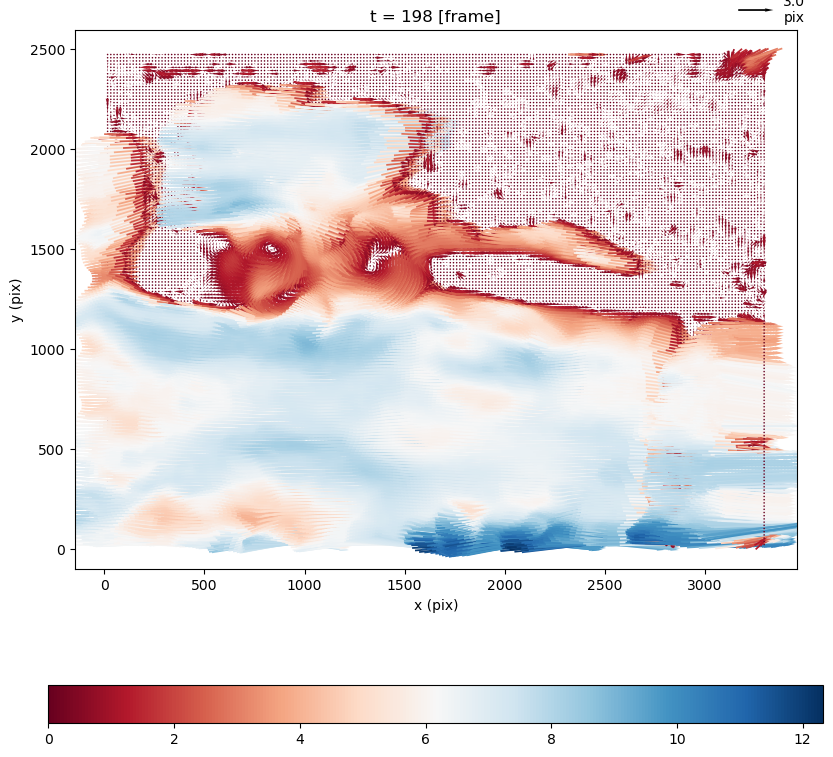

In [7]:
data.isel(t=-2).piv.quiver(colorbar=True,colorbar_orient='horizontal',arrScale=5)

In [8]:
data

<xarray.Dataset>
Dimensions:  (x: 206, y: 154, t: 200)
Coordinates:
  * x        (x) float64 16.0 32.0 48.0 64.0 ... 3.264e+03 3.28e+03 3.296e+03
  * y        (y) float64 2.471e+03 2.455e+03 2.439e+03 ... 55.0 39.0 23.0
  * t        (t) int64 0 1 2 3 4 5 6 7 8 ... 191 192 193 194 195 196 197 198 199
Data variables:
    u        (x, y, t) float64 0.4291 -0.4144 0.03371 0.007509 ... 0.0 0.0 0.0
    v        (x, y, t) float64 -0.0917 0.002311 -0.03968 ... -0.0 -0.0 -0.0
    chc      (x, y, t) float64 5.0 5.0 5.0 5.0 5.0 ... -3.0 -3.0 -3.0 -3.0 -3.0
Attributes: (2)

In [9]:
data.to_netcdf(netcdf_file)

In [10]:
# ds = io.load_directory('/media/user/ExtremePro/amiad/spacer_68_/Analysis/')
# ds.to_netcdf('../data/spacer_68.nc')
# ds = xr.load_dataset('../data/spacer_68.nc')
ds = xr.load_dataset(netcdf_file)

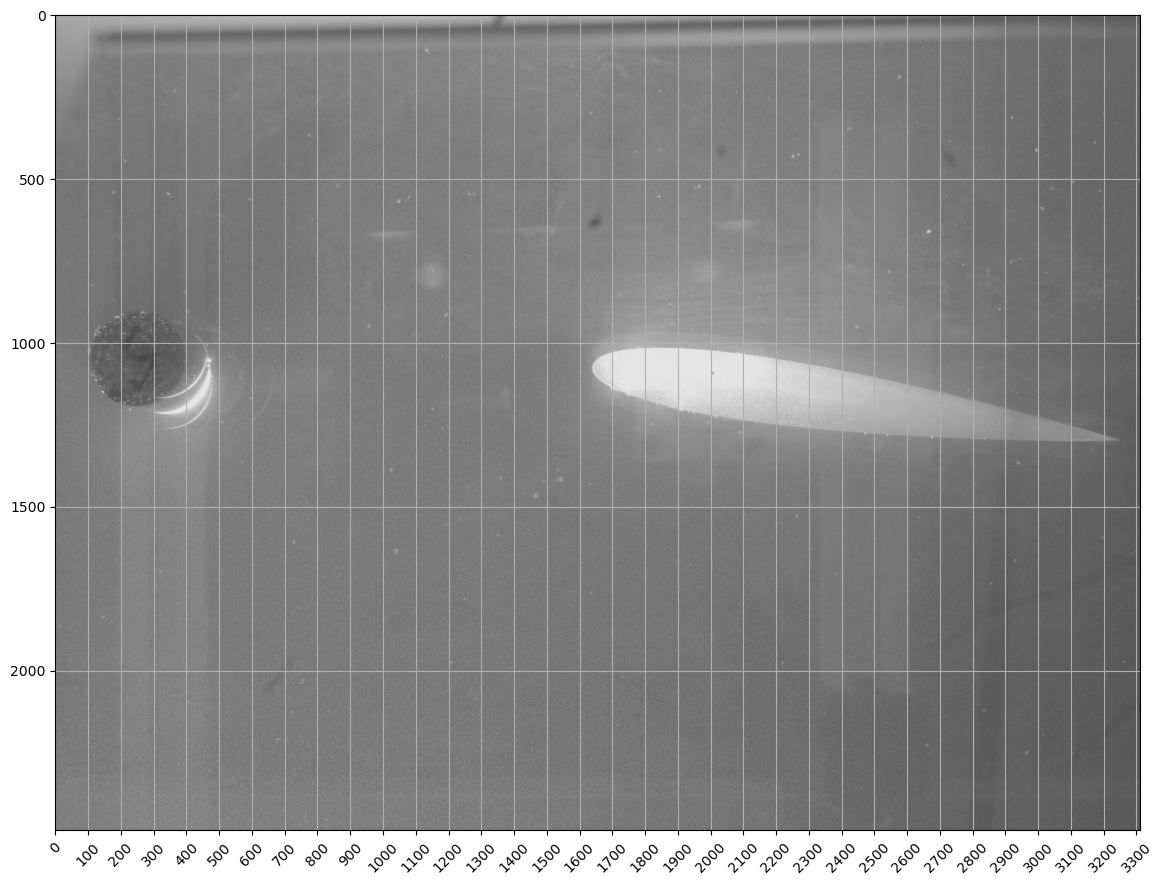

In [11]:
# im = plt.imread('/media/user/ExtremePro/amiad/spacer_68_/RawData/test000120.T000.D000.P000.H000.LB.TIF')

from skimage import exposure 
plt.figure(figsize=(14,14))
plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray')
plt.xticks(np.arange(0,im.shape[1],100),rotation=45)
plt.grid('on')


In [12]:
# right point on 1 is 3240, 1387
# left point on 24 36, 1452
# open the scale image
dist = np.sqrt((3240-36)**2 + (1452-1387)**2)
dist

3204.6592642588384

In [13]:
# we measured 
# mm_diameter = 230 # mm
# pix_diameter = 3204 # pix, see above
# dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec

mm_diameter = 1
pix_diameter = 1
dt = 1

# ds = ds.piv.set_scale(mm_diameter/pix_diameter)
# ds = ds.piv.set_delta_t(dt)
ds['u'] = ds['u']*mm_diameter/pix_diameter
ds['v'] = ds['v']*mm_diameter/pix_diameter
ds['u'] = ds.u / dt
ds['v'] = ds.v / dt

# # now size is in mm and velocity in m/s

ave = ds.piv.average

In [14]:
# import napari
# viewer = napari.Viewer()
# viewer.add_image(im)
# manually measured 750 pixels which is the width 24 mm 

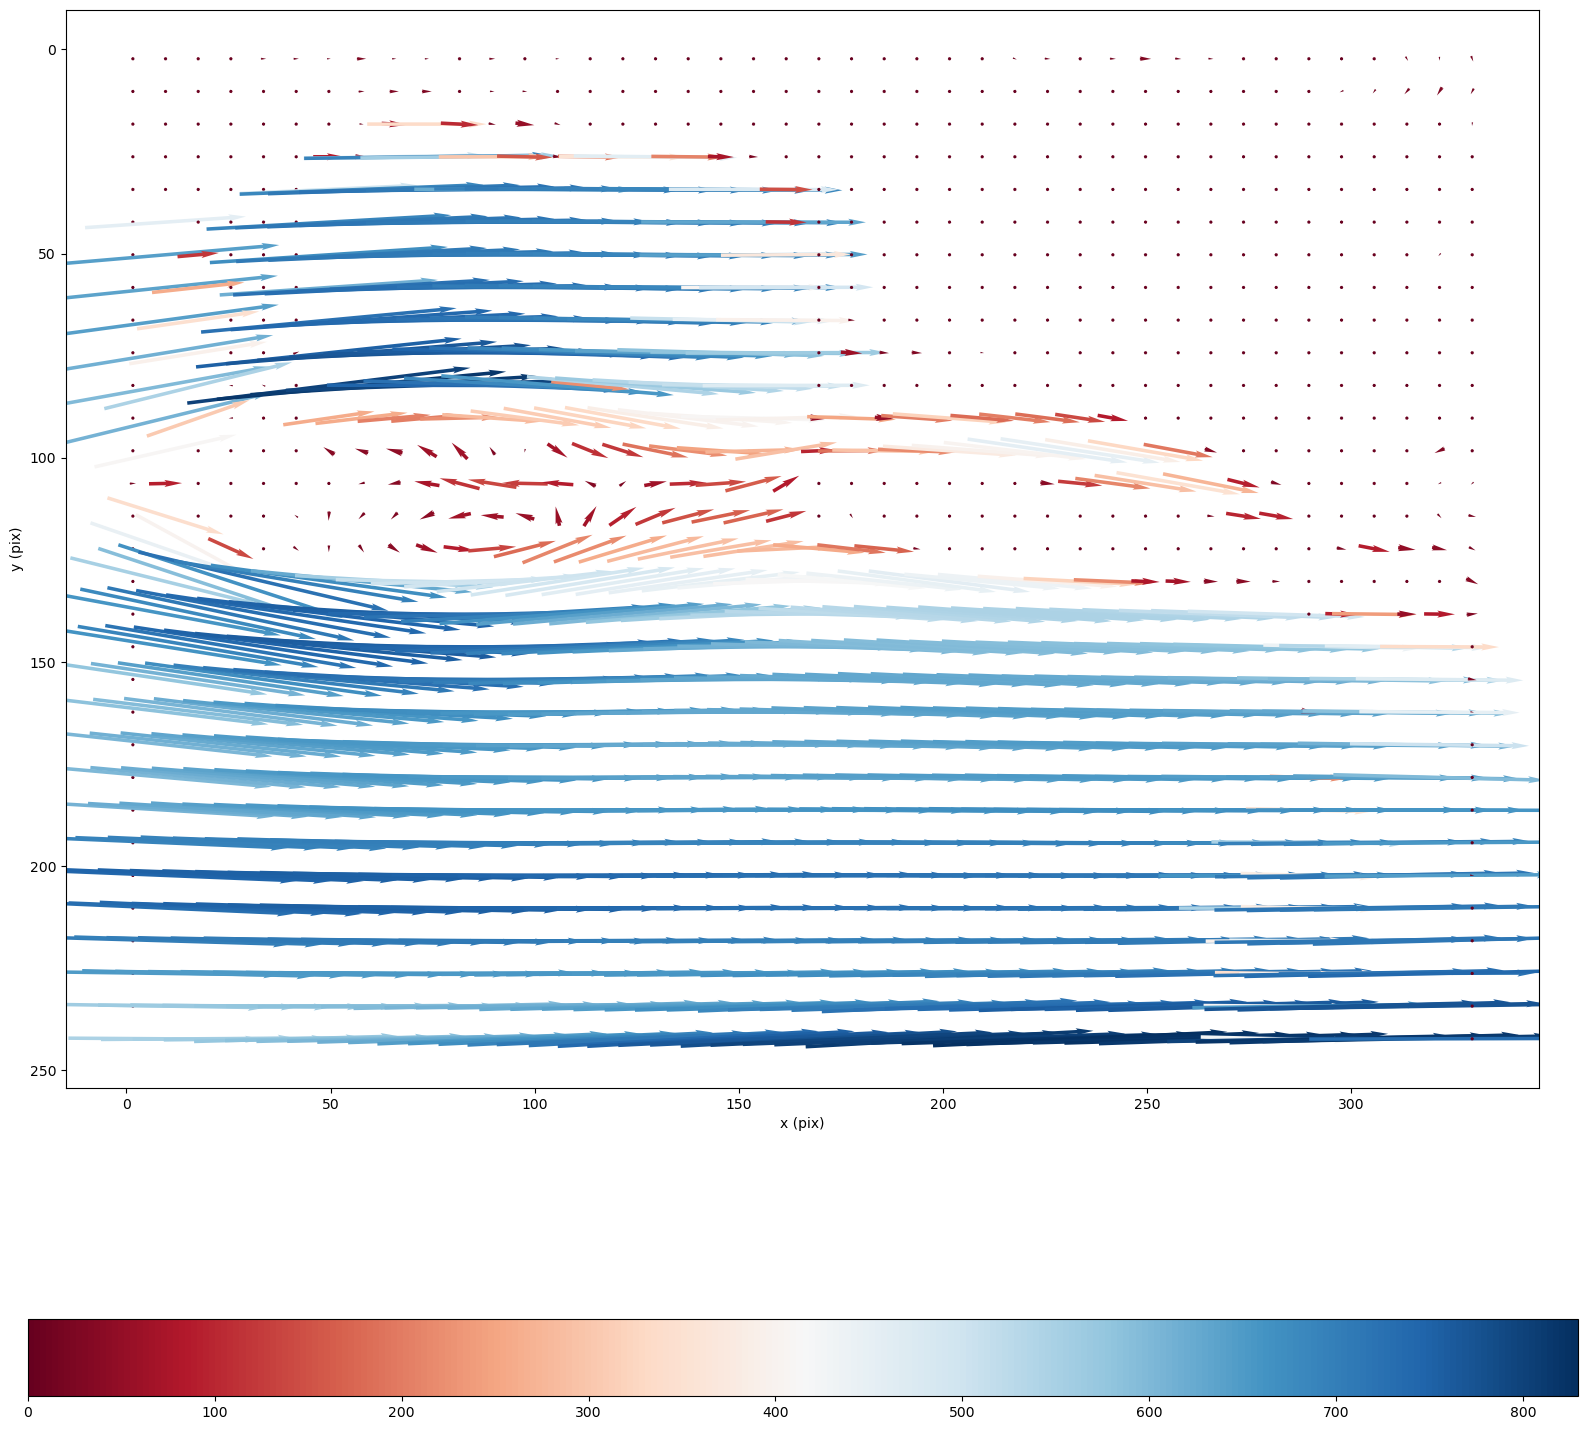

In [15]:
plt.figure(figsize=(20,20))
# plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray',origin='upper')
tmp = ave.copy(deep=True)
tmp['y'] = tmp['y'][::-1]
tmp['x'] = tmp['x']/10
tmp['y'] = tmp['y']/10
tmp['u'] = tmp['u']*100
tmp['v'] = tmp['v']*100 # cm/s 

tmp.piv.quiver(arrScale = 5,colorbar=True, colorbar_orient='horizontal', nthArr = 5)
plt.gca().invert_yaxis()
plt.savefig(res_png,dpi=200)

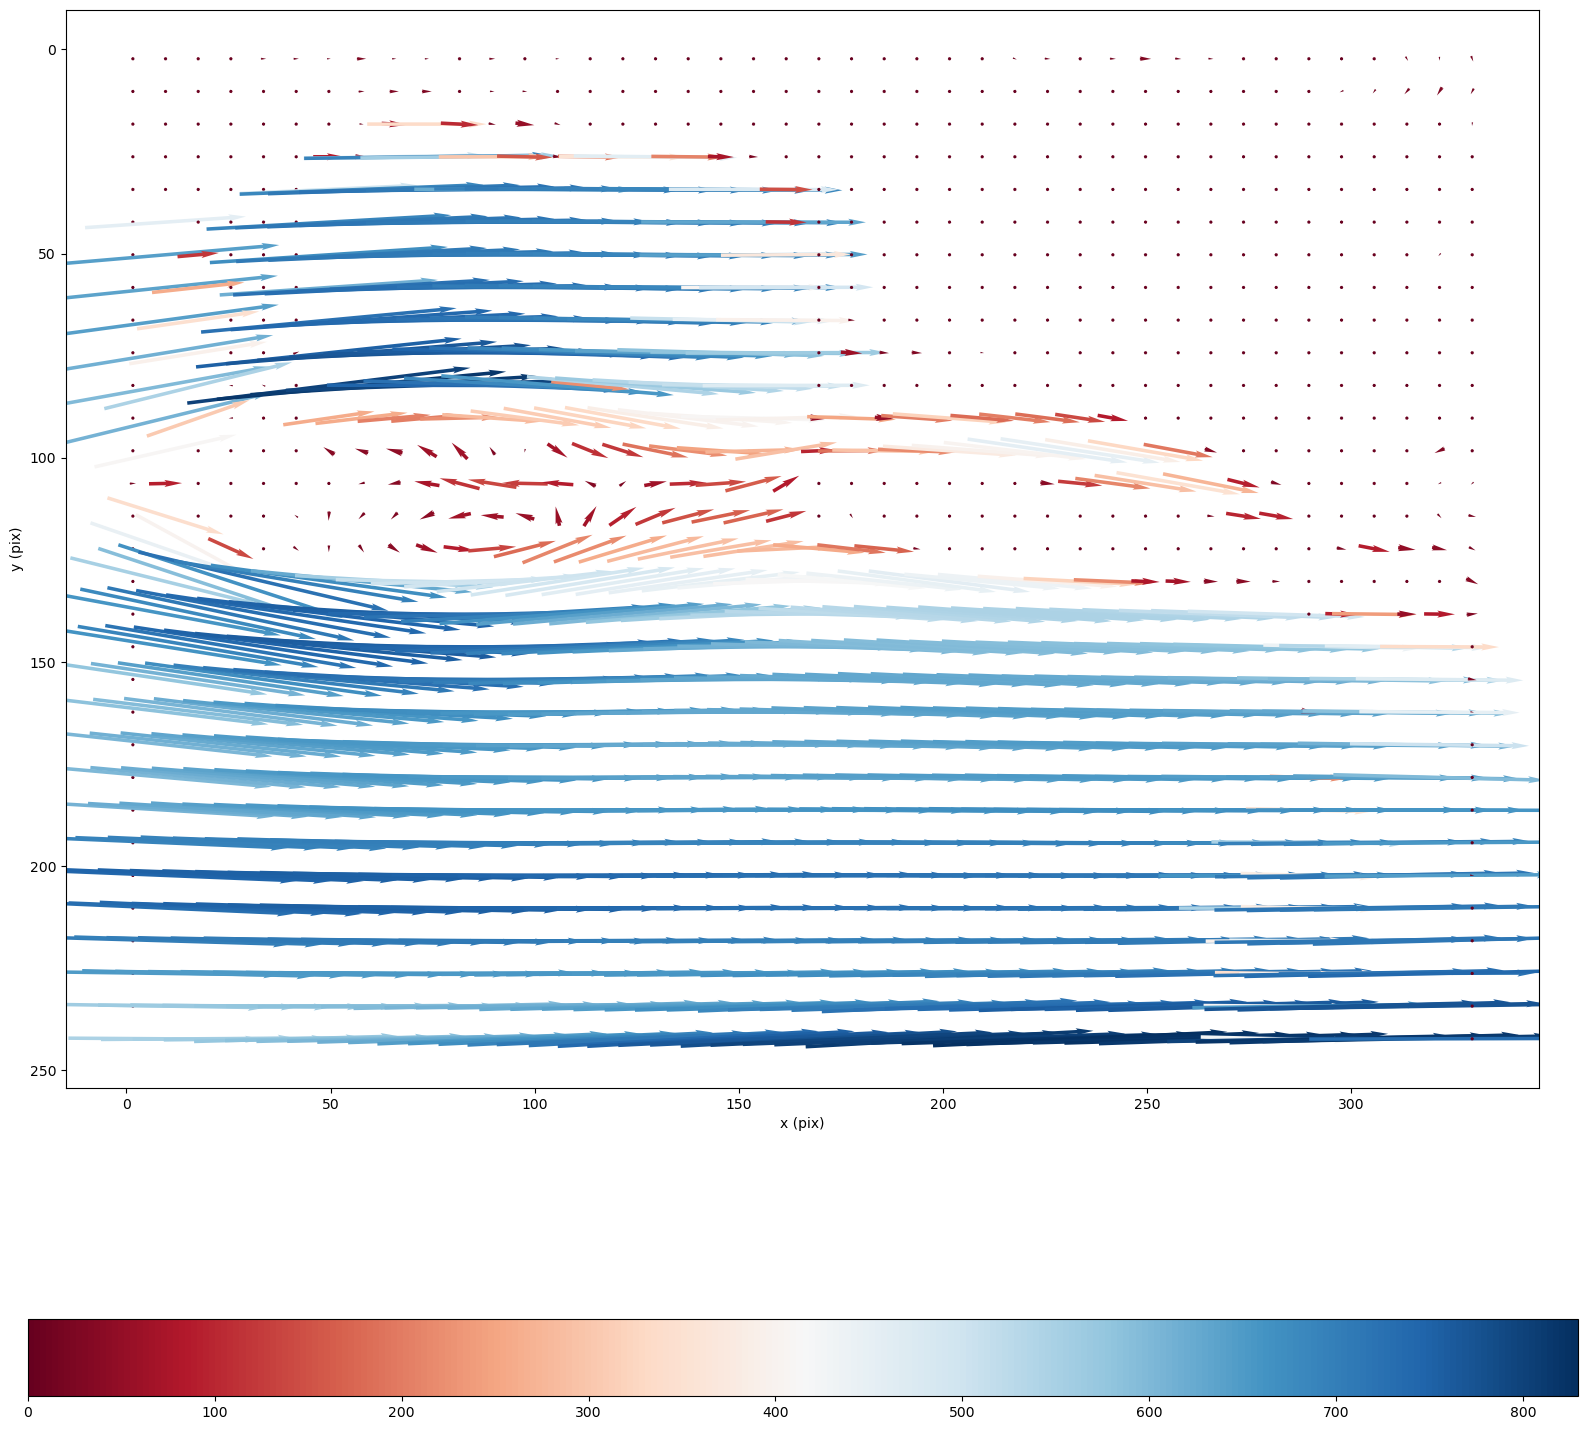

In [16]:
plt.figure(figsize=(20,20))
# plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray',origin='upper')
tmp = ave.copy(deep=True)
tmp['y'] = tmp['y'][::-1]
tmp['x'] = tmp['x']/10
tmp['y'] = tmp['y']/10
tmp['u'] = tmp['u']*100
tmp['v'] = tmp['v']*100 # cm/s 

tmp.piv.quiver(arrScale = 5,colorbar=True, colorbar_orient='horizontal', nthArr = 5)
plt.gca().invert_yaxis()
plt.savefig(res_png,dpi=200)